<h3>Testing Notebook</h3>

In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [3]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
replicas, size = 2, 1288 # replicated

In [4]:
from core.getdata import *
from core.dataset import *
from core.dataset2 import *

<h3>Example of GetData</h3>

In [5]:
TNFib1 = GetData(ligands[0], "", replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [6]:
data = DatasetNaive(ligands, replicas, size) #naive macrophages

In [7]:
%%time
for _ in data:
    pass

Wall time: 5.3 ms


In [8]:
data.data.shape

(11592, 98, 1)

In [9]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(data.labels, data.labels.shape)

[0 0 0 ... 8 8 8] (11592,)


<h3>Initializing Dataloaders</h3>

In [11]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [12]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

10432 1159 9388 1043
11591 11592


In [13]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [14]:
data.data[1000].shape
len(data)

11592

In [15]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len+1]) # still np arrays

In [16]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [17]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

163 19 182


<h3>Model Training</h3>

In [18]:
from core.network import *
from core.trainer import *

In [19]:
torch.cuda.is_available()

True

In [20]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 100
batch_size = 64
learning_rate = 1e-3

In [21]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [22]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [23]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|▊                                                                                 | 1/100 [00:03<05:01,  3.05s/it]

Epoch 001: | Training Loss: 2.133193630382327 | Validation Loss: 2.037825766362642


  2%|█▋                                                                                | 2/100 [00:05<04:12,  2.58s/it]

Epoch 002: | Training Loss: 2.0597711852723104 | Validation Loss: 1.995183028672871


  3%|██▍                                                                               | 3/100 [00:07<03:54,  2.42s/it]

Epoch 003: | Training Loss: 2.03518818858211 | Validation Loss: 2.1779763573094417


  4%|███▎                                                                              | 4/100 [00:09<03:45,  2.35s/it]

Epoch 004: | Training Loss: 2.0430300755003477 | Validation Loss: 1.9325008329592253


  5%|████                                                                              | 5/100 [00:11<03:32,  2.23s/it]

Epoch 005: | Training Loss: 2.031780512055005 | Validation Loss: 2.0081292955498946


  6%|████▉                                                                             | 6/100 [00:14<03:49,  2.44s/it]

Epoch 006: | Training Loss: 1.9769344205505277 | Validation Loss: 1.8871159679011296


  7%|█████▋                                                                            | 7/100 [00:17<03:46,  2.43s/it]

Epoch 007: | Training Loss: 1.933491017189494 | Validation Loss: 1.8885086147408736


  8%|██████▌                                                                           | 8/100 [00:19<03:35,  2.34s/it]

Epoch 008: | Training Loss: 1.9345525605546916 | Validation Loss: 2.059385607117101


  9%|███████▍                                                                          | 9/100 [00:21<03:24,  2.25s/it]

Epoch 009: | Training Loss: 1.978380600367587 | Validation Loss: 2.0162172442988346


 10%|████████                                                                         | 10/100 [00:23<03:14,  2.16s/it]

Epoch 010: | Training Loss: 1.928645101061628 | Validation Loss: 1.8083777364931608


 11%|████████▉                                                                        | 11/100 [00:25<03:06,  2.10s/it]

Epoch 011: | Training Loss: 1.842483600224454 | Validation Loss: 1.803870583835401


 12%|█████████▋                                                                       | 12/100 [00:27<03:00,  2.06s/it]

Epoch 012: | Training Loss: 1.788279488774165 | Validation Loss: 1.7050980517738743


 13%|██████████▌                                                                      | 13/100 [00:29<03:03,  2.11s/it]

Epoch 013: | Training Loss: 1.7463249048572376 | Validation Loss: 1.7040453270861977


 14%|███████████▎                                                                     | 14/100 [00:31<03:09,  2.21s/it]

Epoch 014: | Training Loss: 1.716350114418685 | Validation Loss: 1.6632846656598543


 15%|████████████▏                                                                    | 15/100 [00:33<03:07,  2.20s/it]

Epoch 015: | Training Loss: 1.6851071923788339 | Validation Loss: 1.69425830715581


 16%|████████████▉                                                                    | 16/100 [00:36<03:15,  2.33s/it]

Epoch 016: | Training Loss: 1.6977924298655036 | Validation Loss: 1.6110925109762895


 17%|█████████████▊                                                                   | 17/100 [00:39<03:33,  2.57s/it]

Epoch 017: | Training Loss: 1.5672296271002366 | Validation Loss: 1.4459624164982845


 18%|██████████████▌                                                                  | 18/100 [00:41<03:22,  2.47s/it]

Epoch 018: | Training Loss: 1.4736159703482878 | Validation Loss: 1.4539708212802285


 19%|███████████████▍                                                                 | 19/100 [00:44<03:13,  2.39s/it]

Epoch 019: | Training Loss: 1.4161920072110885 | Validation Loss: 1.3018974410860162


 20%|████████████████▏                                                                | 20/100 [00:46<03:02,  2.28s/it]

Epoch 020: | Training Loss: 1.3525956839871554 | Validation Loss: 1.308091634198239


 21%|█████████████████                                                                | 21/100 [00:48<02:51,  2.17s/it]

Epoch 021: | Training Loss: 1.3018014796672424 | Validation Loss: 1.2690867813009965


 22%|█████████████████▊                                                               | 22/100 [00:50<02:44,  2.11s/it]

Epoch 022: | Training Loss: 1.2926699347291255 | Validation Loss: 1.2249597248278166


 23%|██████████████████▋                                                              | 23/100 [00:52<02:38,  2.06s/it]

Epoch 023: | Training Loss: 1.2545457573756118 | Validation Loss: 1.1828233254583258


 24%|███████████████████▍                                                             | 24/100 [00:53<02:33,  2.03s/it]

Epoch 024: | Training Loss: 1.238979181629017 | Validation Loss: 1.1845687753275822


 25%|████████████████████▎                                                            | 25/100 [00:55<02:30,  2.01s/it]

Epoch 025: | Training Loss: 1.187404302000268 | Validation Loss: 1.160968818162617


 26%|█████████████████████                                                            | 26/100 [00:57<02:27,  1.99s/it]

Epoch 026: | Training Loss: 1.1617782317056247 | Validation Loss: 1.1477801674290706


 27%|█████████████████████▊                                                           | 27/100 [01:00<02:37,  2.16s/it]

Epoch 027: | Training Loss: 1.128792763487693 | Validation Loss: 1.1185951389764484


 28%|██████████████████████▋                                                          | 28/100 [01:02<02:31,  2.11s/it]

Epoch 028: | Training Loss: 1.104863277973573 | Validation Loss: 1.05148551652306


 29%|███████████████████████▍                                                         | 29/100 [01:04<02:26,  2.07s/it]

Epoch 029: | Training Loss: 1.0761893366012105 | Validation Loss: 1.0369040369987488


 30%|████████████████████████▎                                                        | 30/100 [01:06<02:22,  2.03s/it]

Epoch 030: | Training Loss: 1.0535807854558792 | Validation Loss: 1.0722624502683942


 31%|█████████████████████████                                                        | 31/100 [01:08<02:18,  2.01s/it]

Epoch 031: | Training Loss: 1.0388230191417998 | Validation Loss: 1.0047842138691951


 32%|█████████████████████████▉                                                       | 32/100 [01:10<02:15,  2.00s/it]

Epoch 032: | Training Loss: 1.0031768902679163 | Validation Loss: 1.035723705040781


 33%|██████████████████████████▋                                                      | 33/100 [01:12<02:13,  1.99s/it]

Epoch 033: | Training Loss: 0.9896037271417724 | Validation Loss: 0.9949453065269872


 34%|███████████████████████████▌                                                     | 34/100 [01:15<02:30,  2.27s/it]

Epoch 034: | Training Loss: 0.9797324545544349 | Validation Loss: 0.96124120448765


 35%|████████████████████████████▎                                                    | 35/100 [01:17<02:22,  2.20s/it]

Epoch 035: | Training Loss: 0.9539121104164358 | Validation Loss: 0.9403861729722274


 36%|█████████████████████████████▏                                                   | 36/100 [01:19<02:16,  2.13s/it]

Epoch 036: | Training Loss: 0.9470527106267543 | Validation Loss: 0.9378709149988074


 37%|█████████████████████████████▉                                                   | 37/100 [01:21<02:11,  2.08s/it]

Epoch 037: | Training Loss: 0.908718675557821 | Validation Loss: 0.9414043708851463


 38%|██████████████████████████████▊                                                  | 38/100 [01:23<02:06,  2.04s/it]

Epoch 038: | Training Loss: 0.889866654126922 | Validation Loss: 0.9273565160600763


 39%|███████████████████████████████▌                                                 | 39/100 [01:25<02:03,  2.02s/it]

Epoch 039: | Training Loss: 0.8765737008463386 | Validation Loss: 0.8863893119912398


 40%|████████████████████████████████▍                                                | 40/100 [01:27<02:00,  2.00s/it]

Epoch 040: | Training Loss: 0.8530504246430894 | Validation Loss: 0.8774014319244184


 41%|█████████████████████████████████▏                                               | 41/100 [01:28<01:57,  1.99s/it]

Epoch 041: | Training Loss: 0.8295771852592749 | Validation Loss: 0.9374272039062098


 42%|██████████████████████████████████                                               | 42/100 [01:30<01:54,  1.98s/it]

Epoch 042: | Training Loss: 0.8130267141786821 | Validation Loss: 0.8800592014664098


 43%|██████████████████████████████████▊                                              | 43/100 [01:32<01:52,  1.97s/it]

Epoch 043: | Training Loss: 0.7823484079238096 | Validation Loss: 0.833088683454614


 44%|███████████████████████████████████▋                                             | 44/100 [01:35<01:54,  2.04s/it]

Epoch 044: | Training Loss: 0.9724883700440998 | Validation Loss: 0.8854876191992509


 45%|████████████████████████████████████▍                                            | 45/100 [01:37<02:02,  2.23s/it]

Epoch 045: | Training Loss: 0.8125868170904967 | Validation Loss: 0.8593153388876664


 46%|█████████████████████████████████████▎                                           | 46/100 [01:39<01:55,  2.15s/it]

Epoch 046: | Training Loss: 0.7757361648272882 | Validation Loss: 0.8803626298904419


 47%|██████████████████████████████████████                                           | 47/100 [01:41<01:51,  2.09s/it]

Epoch 047: | Training Loss: 0.753836974044519 | Validation Loss: 0.7676922757374612


 48%|██████████████████████████████████████▉                                          | 48/100 [01:43<01:46,  2.05s/it]

Epoch 048: | Training Loss: 0.7188178251491734 | Validation Loss: 0.7900281799466986


 49%|███████████████████████████████████████▋                                         | 49/100 [01:45<01:43,  2.03s/it]

Epoch 049: | Training Loss: 0.6857653927583636 | Validation Loss: 0.8141177171155026


 50%|████████████████████████████████████████▌                                        | 50/100 [01:47<01:40,  2.01s/it]

Epoch 050: | Training Loss: 0.6616731275078709 | Validation Loss: 0.7516188025474548


 51%|█████████████████████████████████████████▎                                       | 51/100 [01:49<01:38,  2.01s/it]

Epoch 051: | Training Loss: 0.6451937569065328 | Validation Loss: 0.797002491198088


 52%|██████████████████████████████████████████                                       | 52/100 [01:51<01:35,  2.00s/it]

Epoch 052: | Training Loss: 0.6159627007926168 | Validation Loss: 0.7825056283097518


 53%|██████████████████████████████████████████▉                                      | 53/100 [01:53<01:33,  1.98s/it]

Epoch 053: | Training Loss: 0.6195904597914292 | Validation Loss: 0.7484754261217619


 54%|███████████████████████████████████████████▋                                     | 54/100 [01:55<01:30,  1.98s/it]

Epoch 054: | Training Loss: 0.6002954281180914 | Validation Loss: 0.7644038890537462


 55%|████████████████████████████████████████████▌                                    | 55/100 [01:57<01:28,  1.97s/it]

Epoch 055: | Training Loss: 0.5584157156798005 | Validation Loss: 0.7054509975408253


 56%|█████████████████████████████████████████████▎                                   | 56/100 [01:59<01:26,  1.96s/it]

Epoch 056: | Training Loss: 0.5496597015784562 | Validation Loss: 0.7193961865023563


 57%|██████████████████████████████████████████████▏                                  | 57/100 [02:02<01:33,  2.17s/it]

Epoch 057: | Training Loss: 0.5243272519916113 | Validation Loss: 0.7198060076487692


 58%|██████████████████████████████████████████████▉                                  | 58/100 [02:03<01:28,  2.11s/it]

Epoch 058: | Training Loss: 0.5140746252302744 | Validation Loss: 0.7291857992347918


 59%|███████████████████████████████████████████████▊                                 | 59/100 [02:05<01:24,  2.06s/it]

Epoch 059: | Training Loss: 0.5173248968607077 | Validation Loss: 0.7699876741359108


 60%|████████████████████████████████████████████████▌                                | 60/100 [02:07<01:21,  2.03s/it]

Epoch 060: | Training Loss: 0.5004560698760799 | Validation Loss: 0.7306735625392512


 61%|█████████████████████████████████████████████████▍                               | 61/100 [02:09<01:18,  2.02s/it]

Epoch 061: | Training Loss: 0.47364349443854 | Validation Loss: 0.7599076064009416


 62%|██████████████████████████████████████████████████▏                              | 62/100 [02:11<01:16,  2.00s/it]

Epoch 062: | Training Loss: 0.4562763807598067 | Validation Loss: 0.6668729593879298


 63%|███████████████████████████████████████████████████                              | 63/100 [02:13<01:13,  1.99s/it]

Epoch 063: | Training Loss: 0.4449159658393977 | Validation Loss: 0.7291136791831568


 64%|███████████████████████████████████████████████████▊                             | 64/100 [02:15<01:11,  1.98s/it]

Epoch 064: | Training Loss: 0.5014738522789961 | Validation Loss: 0.6863479237807425


 65%|████████████████████████████████████████████████████▋                            | 65/100 [02:17<01:11,  2.03s/it]

Epoch 065: | Training Loss: 0.4011351171812397 | Validation Loss: 0.7686961795154371


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [02:20<01:15,  2.23s/it]

Epoch 066: | Training Loss: 0.381630352486862 | Validation Loss: 0.701779023597115


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [02:22<01:11,  2.15s/it]

Epoch 067: | Training Loss: 0.37083383635874906 | Validation Loss: 0.6519377221794505


 68%|███████████████████████████████████████████████████████                          | 68/100 [02:24<01:06,  2.09s/it]

Epoch 068: | Training Loss: 0.382097710952437 | Validation Loss: 0.6564260595723203


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [02:26<01:03,  2.05s/it]

Epoch 069: | Training Loss: 0.5940555165881759 | Validation Loss: 0.6620494880174336


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [02:28<01:00,  2.03s/it]

Epoch 070: | Training Loss: 0.396180736780898 | Validation Loss: 0.6745186165759438


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [02:30<00:58,  2.01s/it]

Epoch 071: | Training Loss: 0.35847730294692737 | Validation Loss: 0.6267370189491072


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [02:32<00:55,  1.99s/it]

Epoch 072: | Training Loss: 0.313983510608322 | Validation Loss: 0.5910307396644432


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [02:34<00:53,  1.98s/it]

Epoch 073: | Training Loss: 0.3163623415802154 | Validation Loss: 0.6481962627486179


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [02:36<00:51,  1.97s/it]

Epoch 074: | Training Loss: 0.2931781525900759 | Validation Loss: 0.6159877290851191


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [02:38<00:49,  1.96s/it]

Epoch 075: | Training Loss: 0.2944640800631119 | Validation Loss: 0.6752565424693259


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [02:40<00:47,  1.96s/it]

Epoch 076: | Training Loss: 0.2839948122669583 | Validation Loss: 0.6309261925910649


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [02:43<00:52,  2.27s/it]

Epoch 077: | Training Loss: 0.268417839760795 | Validation Loss: 0.5963422201181713


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [02:45<00:47,  2.18s/it]

Epoch 078: | Training Loss: 0.3009696292456674 | Validation Loss: 0.7094263544208125


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [02:47<00:44,  2.11s/it]

Epoch 079: | Training Loss: 0.27537774751705624 | Validation Loss: 0.6325623753823733


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [02:49<00:41,  2.08s/it]

Epoch 080: | Training Loss: 0.2212865047751029 | Validation Loss: 0.654978312944111


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [02:51<00:38,  2.04s/it]

Epoch 081: | Training Loss: 0.2434694466689613 | Validation Loss: 0.6521270635880922


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [02:53<00:36,  2.01s/it]

Epoch 082: | Training Loss: 0.26694082240202677 | Validation Loss: 0.744948652229811


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [02:54<00:33,  2.00s/it]

Epoch 083: | Training Loss: 0.27040579462526765 | Validation Loss: 0.859649774275328


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [02:56<00:31,  1.98s/it]

Epoch 084: | Training Loss: 0.2612248890421873 | Validation Loss: 0.6071606411745674


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [02:58<00:29,  1.97s/it]

Epoch 085: | Training Loss: 0.2207897592998721 | Validation Loss: 0.6929557511681005


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [03:00<00:27,  1.97s/it]

Epoch 086: | Training Loss: 0.26101650955852557 | Validation Loss: 0.7628205826407984


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [03:02<00:25,  1.96s/it]

Epoch 087: | Training Loss: 0.22065675368338275 | Validation Loss: 0.6329828971310666


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [03:04<00:23,  1.95s/it]

Epoch 088: | Training Loss: 0.20114516055474252 | Validation Loss: 0.6800184485159422


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [03:06<00:22,  2.05s/it]

Epoch 089: | Training Loss: 0.18878280885654725 | Validation Loss: 0.6214445656851718


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [03:09<00:21,  2.15s/it]

Epoch 090: | Training Loss: 0.15556301053133478 | Validation Loss: 0.6120820139583788


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [03:11<00:18,  2.10s/it]

Epoch 091: | Training Loss: 0.1367933196158497 | Validation Loss: 0.610722213297298


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [03:13<00:16,  2.05s/it]

Epoch 092: | Training Loss: 0.12363276964316339 | Validation Loss: 0.6767439759875599


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [03:15<00:14,  2.03s/it]

Epoch 093: | Training Loss: 0.2810904750246212 | Validation Loss: 0.6965494171569222


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [03:17<00:12,  2.01s/it]

Epoch 094: | Training Loss: 0.22679707823904013 | Validation Loss: 0.6963955524720644


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [03:19<00:09,  1.99s/it]

Epoch 095: | Training Loss: 0.148480303402693 | Validation Loss: 0.7313921169230813


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [03:21<00:07,  1.98s/it]

Epoch 096: | Training Loss: 0.26103914597648786 | Validation Loss: 0.6987421126840146


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [03:23<00:05,  1.97s/it]

Epoch 097: | Training Loss: 0.14327532562650055 | Validation Loss: 0.6113085903619465


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [03:25<00:04,  2.02s/it]

Epoch 098: | Training Loss: 0.18397229194549694 | Validation Loss: 0.6589946038040676


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [03:27<00:02,  2.24s/it]

Epoch 099: | Training Loss: 0.11725847701902038 | Validation Loss: 0.7041177918252192


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:29<00:00,  2.10s/it]

Epoch 100: | Training Loss: 0.12938893362422663 | Validation Loss: 0.6819517690884439


<h3>Evaluation</h3>

In [24]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:1160]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [25]:
df

,y_pred,y_true
0,7,7
1,8,8
2,4,4
3,5,4
4,5,5
...,...,...
1155,7,7
1156,5,5
1157,2,2
1158,2,2


In [26]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/1160}')

 Accuracy: 0.85


In [27]:
import pickle
import os
torch.save(model.state_dict(), '../models/lstm.pth')

<h3>Plots</h3>

In [28]:
import matplotlib.pyplot as plt

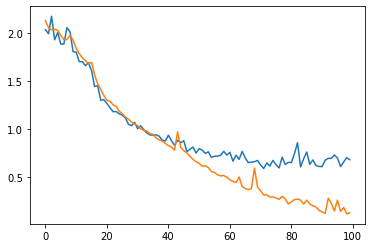

In [29]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

Overfitting occurs around ~90 epochs; slightly improved accuracy for naive vs polarized

<h3>Classification Report</h3>

In [30]:
# not a holistic look at the data

In [31]:
import sklearn.metrics

In [32]:
report = sklearn.metrics.classification_report(dic["y_true"], dic["y_pred"], target_names=ligands, output_dict=True)
rep = pd.DataFrame(report).transpose()

In [33]:
rep

,precision,recall,f1-score,support
TNF,0.866142,0.887097,0.876494,124.00
R84,0.906780,0.849206,0.877049,126.00
PIC,0.956790,0.956790,0.956790,162.00
P3K,0.881818,0.808333,0.843478,120.00
FLA,0.754545,0.783019,0.768519,106.00
CpG,0.759398,0.737226,0.748148,137.00
FSL,0.711712,0.681034,0.696035,116.00
LPS,0.821192,0.892086,0.855172,139.00
UST,0.942029,1.000000,0.970149,130.00
accuracy,0.850000,0.850000,0.850000,0.85


In [34]:
confusion = sklearn.metrics.confusion_matrix(dic["y_true"], dic["y_pred"])
plot = sklearn.metrics.ConfusionMatrixDisplay(confusion)

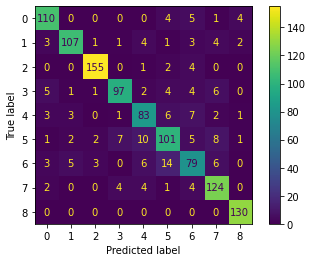

In [35]:
plot.plot()